# Exercise 3 – Function Approximation with MLP

Goal: Use an MLP for regression.

- Generate data from the function y = sin(x) in the interval [-π, π].
- Train an MLP with 1 or 2 hidden layers to predict the outputs.
- Compare the network’s predictions with the true curve.
- Experiment with different numbers of neurons in the hidden layer and observe overfitting vs underfitting.

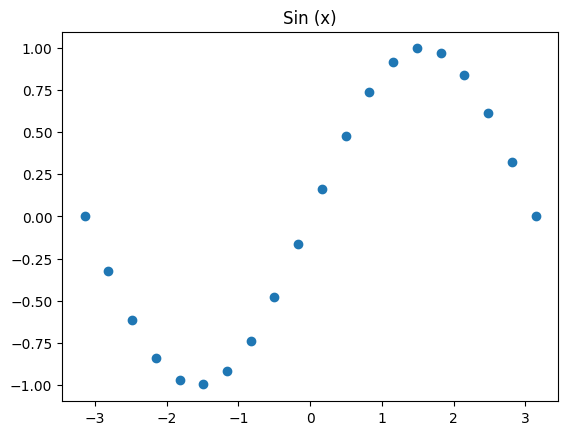

In [31]:
import numpy as np
import matplotlib.pyplot as plt

feature = np.linspace(-3.1415, 3.1415, 20)
target = np.sin(feature)

plt.scatter(feature, target)
plt.title("Sin (x)")
plt.show()

In [4]:
from tensorflow import keras
from keras import layers

inputs = layers.Input(shape=(1,), name="InputLayer")
hidden = layers.Dense(4, activation="tanh" ,name="HiddenLayer")(inputs)
outputs = layers.Dense(1, name="OutputLayer")(hidden)

model = keras.Model(inputs=inputs, outputs=outputs, name="NetworkApproxSin")
model.summary()

Model: "NetworkApproxSin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 1)]               0         
                                                                 
 HiddenLayer (Dense)         (None, 4)                 8         
                                                                 
 OutputLayer (Dense)         (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate= 0.01)
model.compile(optimizer=optimizer,
              loss="mse",
              metrics=["mse"])

model.fit(feature, target, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 408ms/step - loss: 0.0013 - mse: 0.0013
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 0.0034
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - mse: 0.0017
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - mse: 0.0012
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0019 - mse: 0.0019
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0018 - mse: 0.0018
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - mse

1/1 [==============================] - 0s 26ms/step


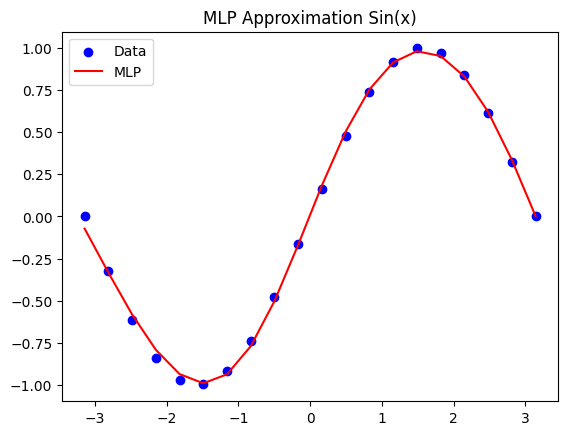

In [30]:
y = model.predict(feature)

plt.scatter(feature, target, c='blue', label="Data")
plt.plot(feature, y, c='red', label="MLP")
plt.title("MLP Approximation Sin(x)")
plt.legend()
plt.show()